# Analysis of the Hotel Demands and Bookings Cancellation

Hotels booking cancelation make it harder to accurately forecast and optimize
occupancy which in turn results in revenue loss. The goal of this project is to
predict in advance weather a hotel customer will cancel his booking or not.
Predicting future booking cancellation can help hotels plan for cancellation and
refund policies, staffing schedules as well as targeting customers with offers and
discounts. It is also important to understand key booking cancellation factors and
how those factors relate to booking cancellation.

## Import Libaries

In [534]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [535]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [536]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold
#from pycaret.classification import *

## Load dataset

I used "Hotel booking demand” dataset available on Kaggle(https://www.kaggle.com/jessemostipak/hotel-booking-demand).

In [537]:
df_booking = pd.read_csv('hotel_bookings.csv')

In [538]:
df_booking.shape

(119390, 32)

In [539]:
df_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

The dataset consists of 119,390 observations with 32 features. The individual
sample/unit of analysis in this project is a single booking made by a hotel
customer. There are 32 features related to the booking, including booking date,
lead time, number of adults, children, babes, deposit type and previous
cancellations.

### Change columns order

In [540]:
cols=['is_canceled','hotel','lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
df_booking=df_booking[cols] 

## EDA



## Exploring the Null values


In [541]:
df_booking.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


#### we can see that adr has an outlier

Text(0.5, 1.0, 'Detecting outliers in adr')

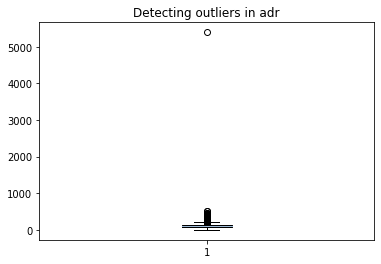

In [542]:
plt.boxplot(df_booking['adr'])
plt.title("Detecting outliers in adr")

In [543]:
df_booking[df_booking['adr']>1000].adr=df_booking['adr'].mean()

/home/safa/anaconda3/envs/keras2/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [544]:
df_booking.loc[df_booking['adr'] > 1000, 'adr'] = df_booking['adr'].mean()

In [545]:
df_booking[df_booking['adr']>1000]

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


Text(0.5, 1.0, 'Detecting outliers in adr')

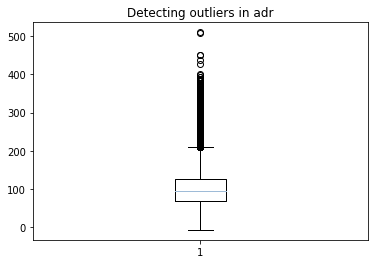

In [546]:
plt.boxplot(df_booking['adr'])
plt.title("Detecting outliers in adr")

In [547]:
df_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [548]:
# Check for nulls 
 
print ("Top Columns having missing values") 
 
missmap = df_booking.isnull().sum().to_frame() 
missmap = missmap.sort_values(0, ascending = False) 
missmap.head()

Top Columns having missing values


,0
company,112593
agent,16340
country,488
children,4
reserved_room_type,0


In [549]:
# drop the company column as it is dominated by Null values
df_booking.drop(columns=['company'],axis=1, inplace=True)

# drop the raws with missing children values (only 4 raws)
df_booking.dropna(subset=['children'], inplace=True)

df_booking['country'].replace(np.nan,df_booking['country'].mode().values[0], inplace=True)

# try non-existing value
df_booking['agent'].replace(np.nan,df_booking['agent'].max(), inplace=True)

In [550]:
# Check for nulls 
 
print ("Top Columns having missing values") 
 
missmap = df_booking.isnull().sum().to_frame() 
missmap = missmap.sort_values(0, ascending = False) 
missmap.head()

Top Columns having missing values


,0
is_canceled,0
is_repeated_guest,0
reservation_status,0
total_of_special_requests,0
required_car_parking_spaces,0


## Exploring  data types  and values

In [551]:

columns=df_booking.columns

for col in columns:
    print('{} Possible Values:{}'.format(col,df_booking[col].unique()))


is_canceled Possible Values:[0 1]
hotel Possible Values:['Resort Hotel' 'City Hotel']
lead_time Possible Values:[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174

### Change type of arrival_date_month,children agent

In [552]:
df_booking['arrival_date_month']=df_booking['arrival_date_month'].astype(str)
df_booking['children']=df_booking['children'].astype(int)
df_booking['agent']=df_booking['agent'].astype(int)


In [553]:
df_booking.is_canceled.value_counts()


0    75166
1    44220
Name: is_canceled, dtype: int64

### Create new booking_date Column

In [554]:
# Take the date and time fields into a single datetime column

df=pd.DataFrame({
    'year':df_booking.arrival_date_year,
    'month': df_booking.arrival_date_month,
    'day': df_booking.arrival_date_day_of_month
})
#df['month'] = pd.to_datetime(df.month, format='%B').dt.month
#df_booking["booking_date"] = pd.to_datetime(df)


In [555]:
#df_booking["booking_date"]

### Identify hotel type with highest number of cancellation

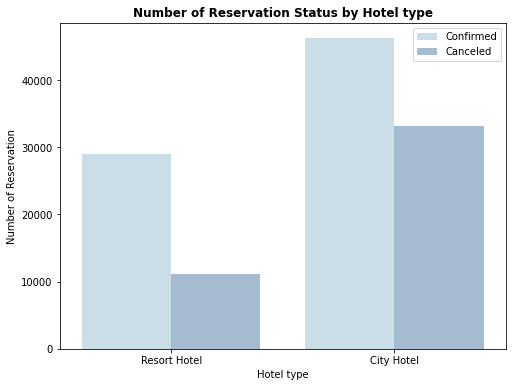

In [556]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', data = df_booking, hue = 'is_canceled')
plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Hotel type", weight='bold')
plt.xlabel('Hotel type')
plt.ylabel('Number of Reservation')
plt.show()

### Identify year with highest number of confirmation/cancellation

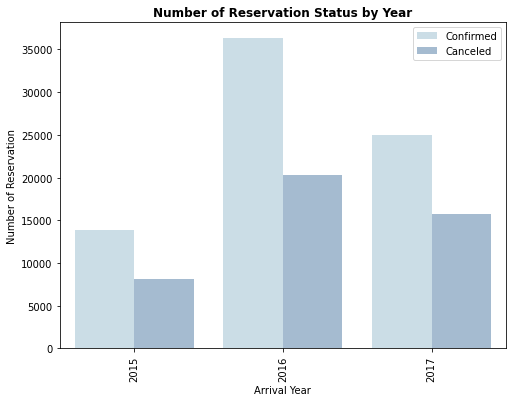

In [557]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'arrival_date_year', data = df_booking, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Year", weight='bold')
plt.xlabel('Arrival Year')
plt.ylabel('Number of Reservation')
plt.xticks(rotation=90)
plt.show()

### Identify months with highest number of confirmation/cancellation

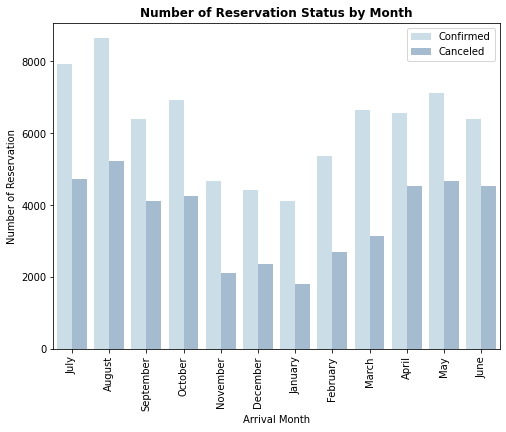

In [558]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'arrival_date_month', data = df_booking, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Month", weight='bold')
plt.xlabel('Arrival Month')
plt.ylabel('Number of Reservation')
plt.xticks(rotation=90)
plt.show()

In [559]:
canceled_month

,is_canceled,canceled_percentage
arrival_date_month,,
January,1807,4.086386
February,2696,6.096789
March,3149,7.121212
April,4524,10.230665
May,4677,10.576662
June,4535,10.255540
July,4742,10.723654
August,5235,11.838535
September,4116,9.308005


In [560]:
 canceled_month.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='arrival_date_month')

In [645]:
booking_month=df_booking.groupby('arrival_date_month').count()
booking_month=booking_month.iloc[:,[0]]

canceled_month=df_booking.groupby('arrival_date_month').sum()
canceled_month=canceled_month.iloc[:,[0]]

booking_month=booking_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

canceled_month=canceled_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

booking_month['booking_percentage'] = (booking_month['is_canceled']/booking_month['is_canceled'].sum() )*100
canceled_month['canceled_percentage'] = (canceled_month['is_canceled']/canceled_month['is_canceled'].sum() )*100

booking_month.reset_index(level=0, inplace=True)
canceled_month.reset_index(level=0, inplace=True)
#booking_month['arrival_date_month'] = booking_month.index
#canceled_month['arrival_date_month'] = canceled_month.index

In [646]:
booking_month

,arrival_date_month,is_canceled,booking_percentage
0,January,5929,4.966244
1,February,8068,6.757911
2,March,9794,8.203642
3,April,11089,9.288359
4,May,11791,9.876367
5,June,10939,9.162716
6,July,12661,10.605096
7,August,13873,11.620290
8,September,10508,8.801702
9,October,11160,9.347830


In [649]:
canceled_month

,arrival_date_month,is_canceled,canceled_percentage
0,January,1807,4.086386
1,February,2696,6.096789
2,March,3149,7.121212
3,April,4524,10.230665
4,May,4677,10.576662
5,June,4535,10.255540
6,July,4742,10.723654
7,August,5235,11.838535
8,September,4116,9.308005
9,October,4246,9.601990


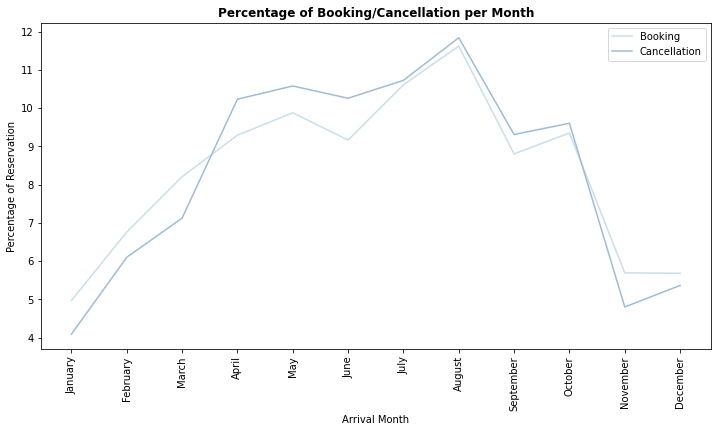

In [654]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (12,6))
plt.xticks(rotation=90)
sns.lineplot(x = 'arrival_date_month',y='booking_percentage', data = booking_month,sort=False)
sns.lineplot(x ='arrival_date_month',y='canceled_percentage', data = canceled_month,sort=False)
plt.legend(labels=['Booking', 'Cancellation'])
plt.title("Percentage of Booking/Cancellation per Month", weight='bold')
plt.xlabel('Arrival Month')
plt.ylabel('Percentage of Reservation')

plt.show()


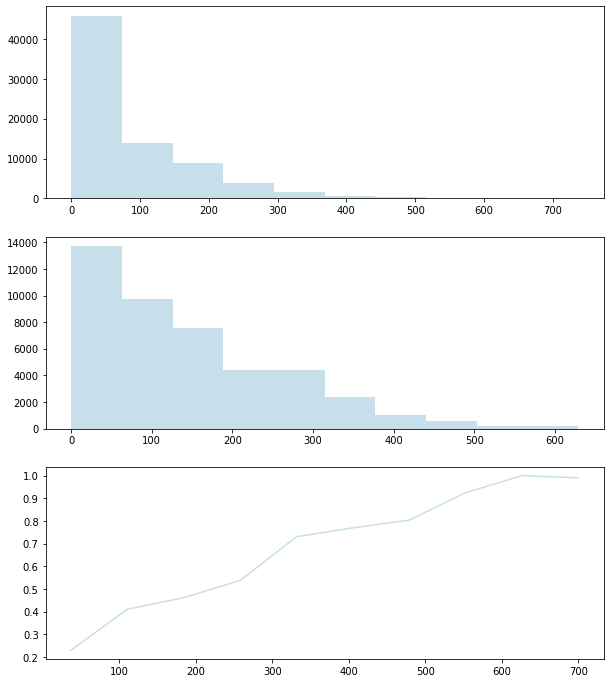

In [563]:
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(df_booking.loc[(df_booking['is_canceled']==0),'lead_time'], bins=10, )
count1, bins_1, _ = ax[1].hist(df_booking.loc[(df_booking['is_canceled']==1),'lead_time'], bins=10,)
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

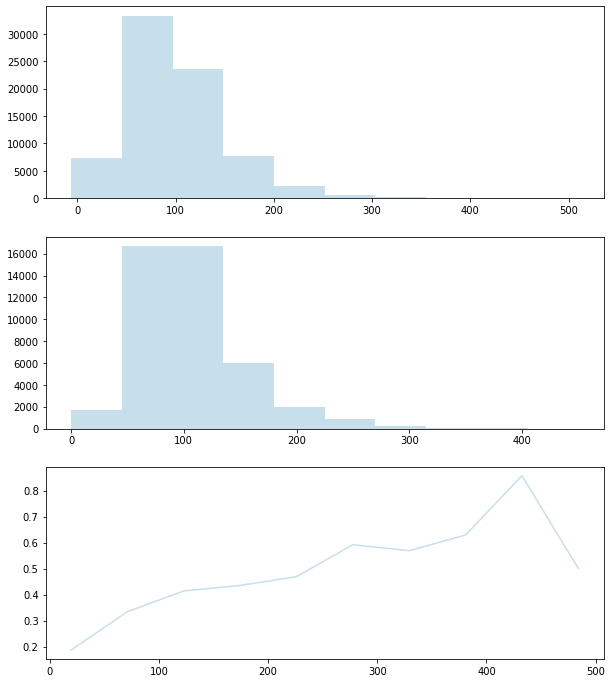

In [564]:
# Make histogram
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(df_booking.loc[(df_booking['is_canceled']==0),'adr'], bins=10)
count1, bins_1, _ = ax[1].hist(df_booking.loc[(df_booking['is_canceled']==1),'adr'], bins=10)
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0));

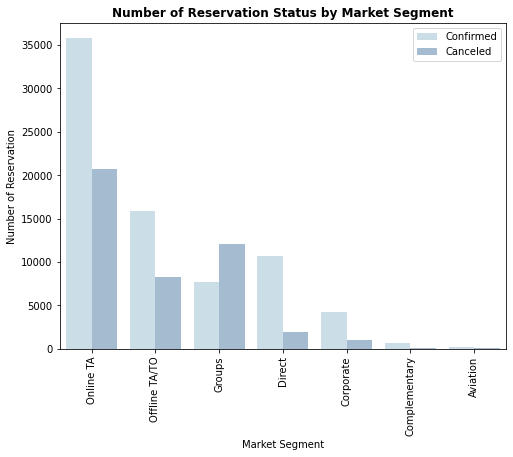

In [636]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'market_segment', data = df_booking, hue = 'is_canceled',order = df_booking['market_segment'].value_counts().index)

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Market Segment", weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Reservation')
plt.xticks(rotation=90)
plt.show()

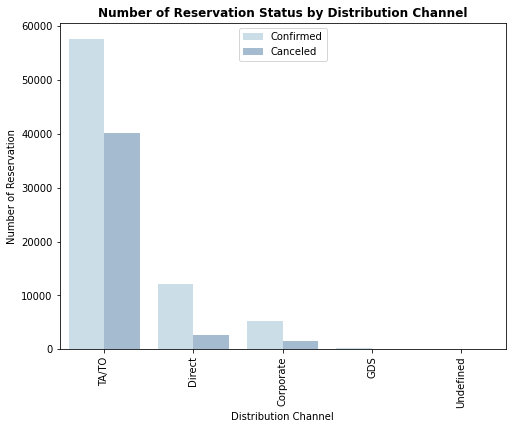

In [635]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'distribution_channel', data = df_booking, hue = 'is_canceled', order = df_booking['distribution_channel'].value_counts().index)

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Distribution Channel", weight='bold')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Reservation')
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Number of Reservation')

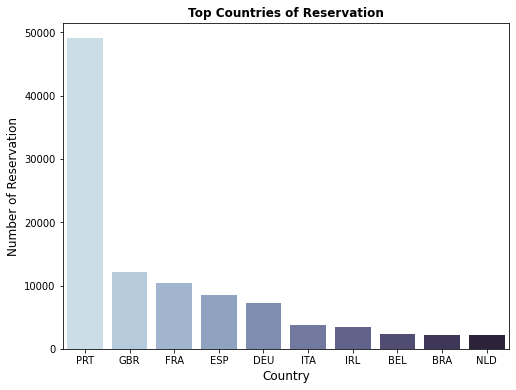

In [567]:

plt.figure(figsize=(8,6))
topcountries=df_booking['country'].value_counts().iloc[:10]
sns.countplot(x='country', data=df_booking, 
              order=topcountries.index, palette="ch:s=.25,rot=-.25")
plt.title('Top Countries of Reservation', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Reservation', fontsize=12)

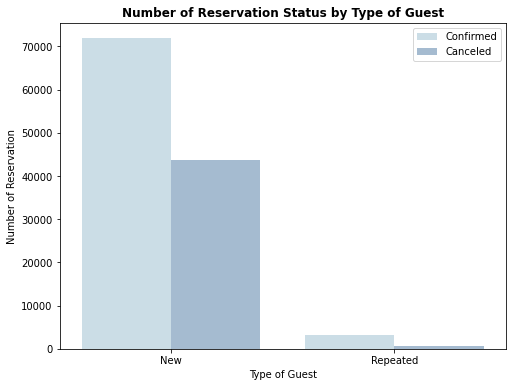

In [568]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'is_repeated_guest', data = df_booking, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Type of Guest", weight='bold')
plt.xlabel('Type of Guest')
plt.ylabel('Number of Reservation')
plt.xticks([0,1],['New','Repeated'])

plt.show()

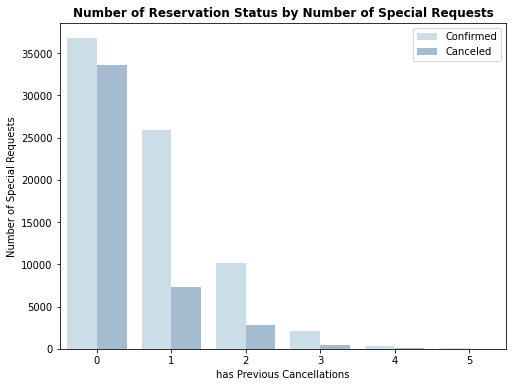

In [569]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'total_of_special_requests', data = df_booking, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservation Status by Number of Special Requests", weight='bold')
plt.xlabel('has Previous Cancellations')
plt.ylabel('Number of Special Requests')
plt.xticks()

plt.show()

In [570]:
# columns with dtype object
#categorical_features = list(df_booking.select_dtypes(include=['object']).columns)
#categorical_features.remove('reservation_status_date')

In [571]:
d=df_booking.copy()

### Compute and display correlation matrix

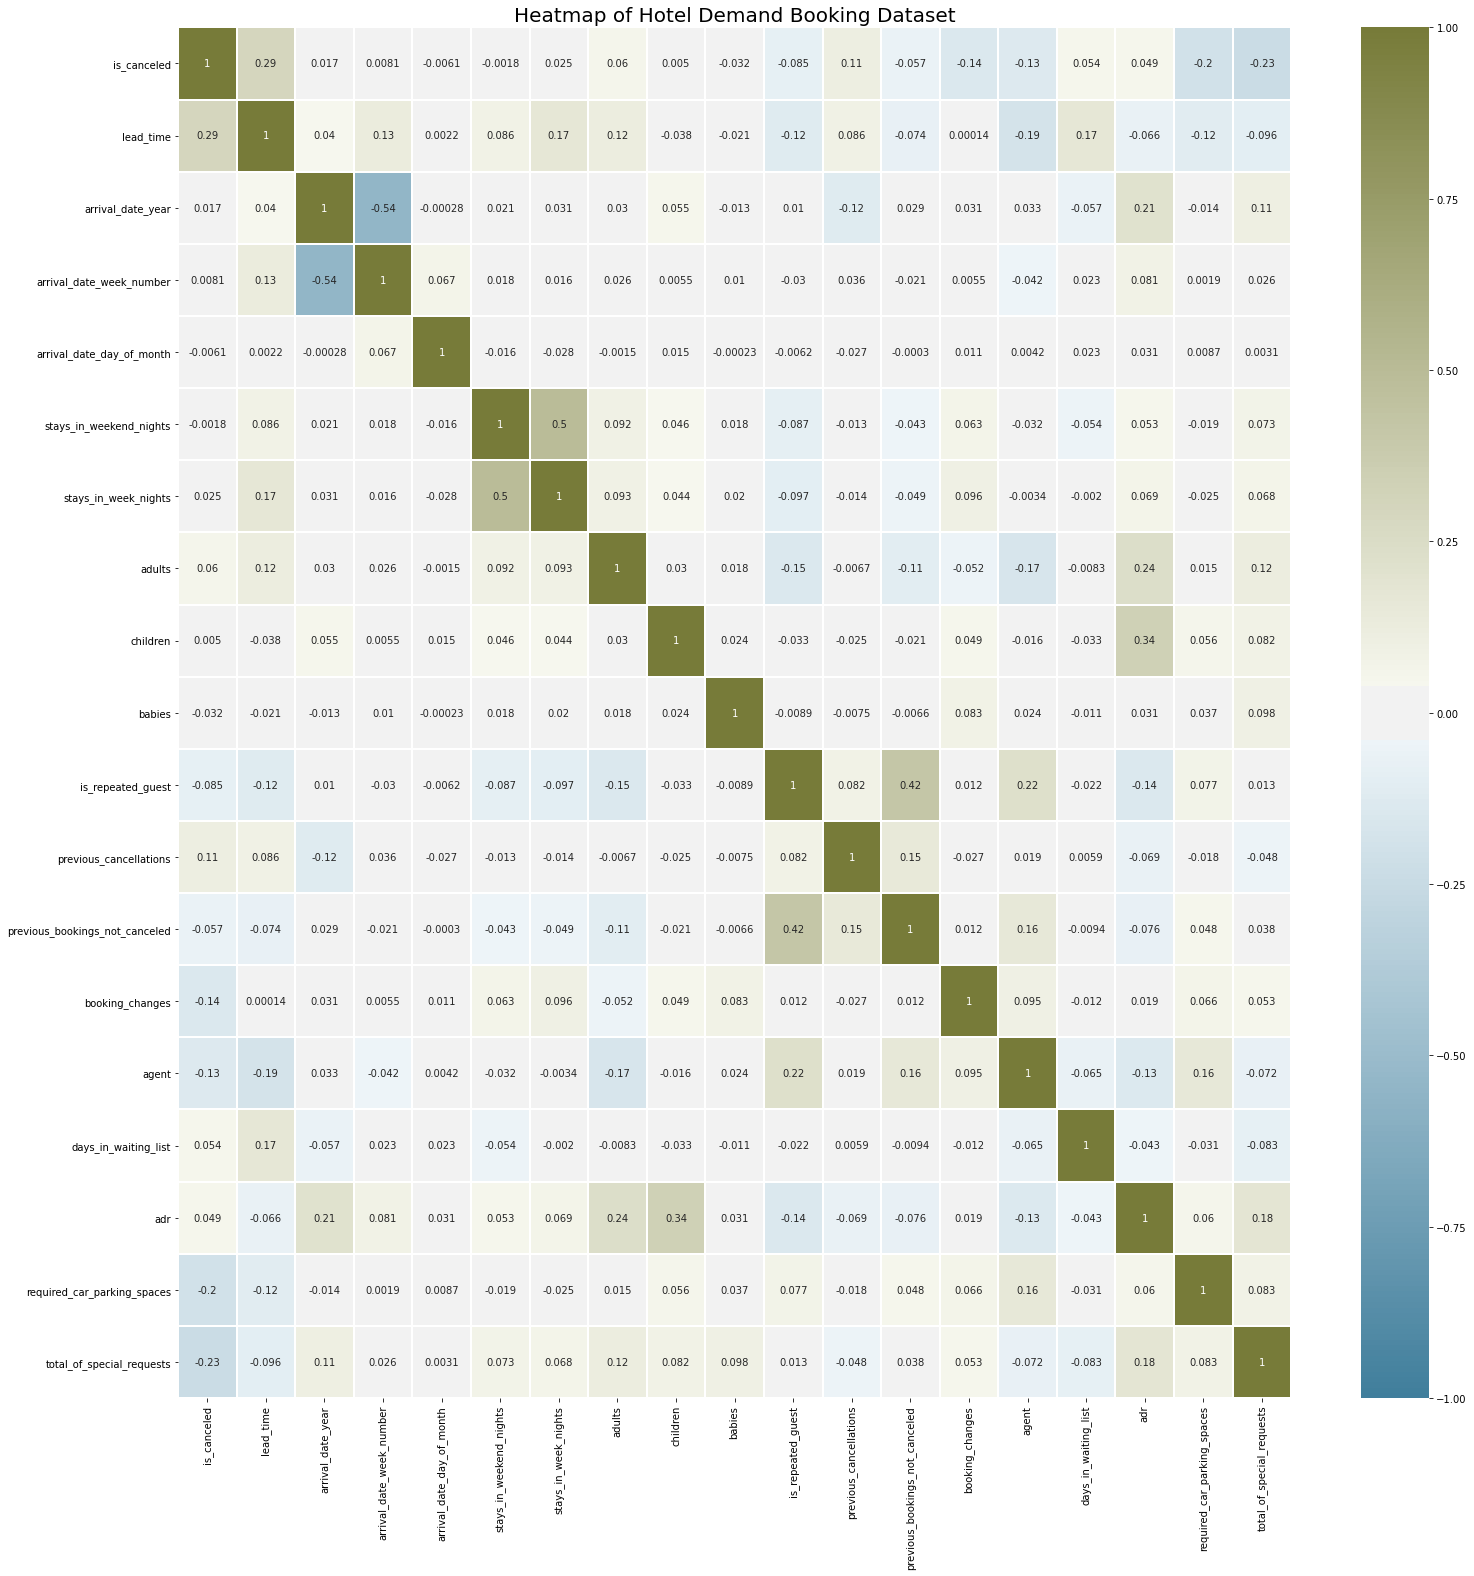

In [572]:


#sns.set_theme(style="white",font_scale = 1)

# Generate a large random dataset
rs = np.random.RandomState(42)

corr = d.corr()


f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(230, 90, as_cmap=True)


heat_plot =sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, annot=True, center=0,
             linewidths=1, )

fig = heat_plot.get_figure()
plt.title('Heatmap of Hotel Demand Booking Dataset',fontsize = 20)
plt.tight_layout() 

fig.savefig('heat_plot.jpg') 
 

In [573]:
cor = (d.corr()**2)**0.5
cor_mat = cor["is_canceled"].sort_values(ascending=True)
cor_mat*100

stays_in_weekend_nights             0.178338
children                            0.504779
arrival_date_day_of_month           0.608413
arrival_date_week_number            0.813199
arrival_date_year                   1.673249
stays_in_week_nights                2.477143
babies                              3.248845
adr                                 4.877698
days_in_waiting_list                5.419315
previous_bookings_not_canceled      5.735537
adults                              5.999027
is_repeated_guest                   8.478795
previous_cancellations             11.014047
agent                              12.823315
booking_changes                    14.437057
required_car_parking_spaces        19.549246
total_of_special_requests          23.470590
lead_time                          29.317738
is_canceled                       100.000000
Name: is_canceled, dtype: float64


The heatmap reveals statistically significant correlations between the target variable and reservation_ status, lead_time, country, deposit_type. By checking reservation_ status values, it appears that it is highly correlated with the target and should be eliminated from further analysis.

### Features Engineering

In [574]:
df_booking.columns

Index(['is_canceled', 'hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Add Features

In [575]:
## Make a new column which contain 1 if guest got the same room he/she booked
d['got_required__room'] = 0
d.loc[ df_booking['reserved_room_type'] == d['assigned_room_type'] , 'got_required__room'] = 1


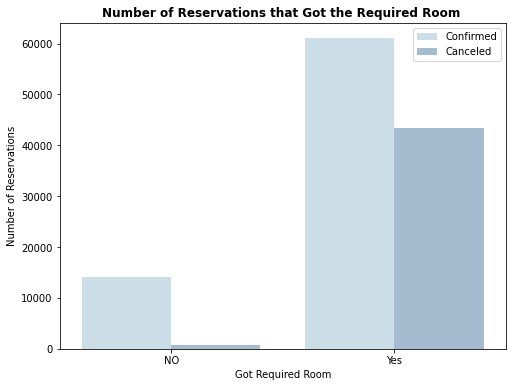

In [576]:


sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'got_required__room', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations that Got the Required Room ", weight='bold')
plt.xlabel('Got Required Room')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

### Change Features

In [577]:
d['babies'] = np.where(d['babies']>= 1, 1, 0)


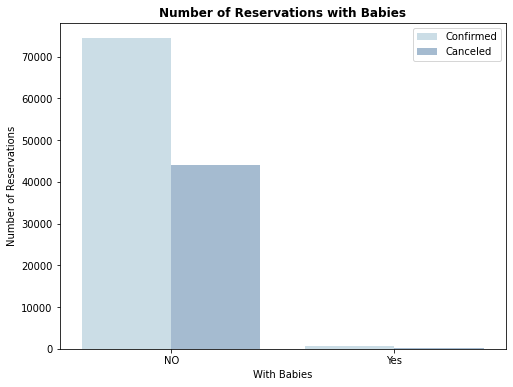

In [578]:

sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'babies', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations with Babies", weight='bold')
plt.xlabel('With Babies')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

In [579]:
d['children'] = np.where(d['children']>= 1, 1, 0)

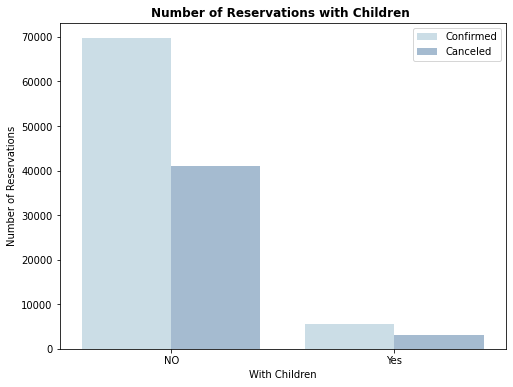

In [580]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'children', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations with Children ", weight='bold')
plt.xlabel('With Children')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

In [581]:
d['previous_cancellations'] = np.where(d['previous_cancellations']>= 1, 1, 0)

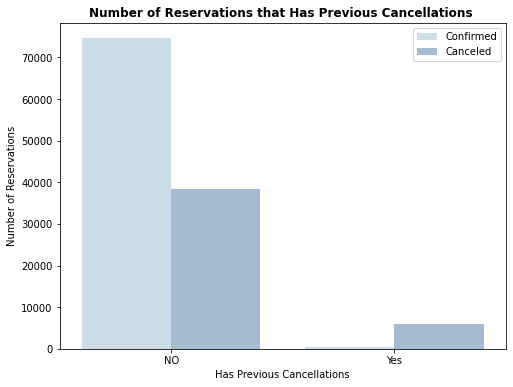

In [582]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'previous_cancellations', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations that Has Previous Cancellations ", weight='bold')
plt.xlabel('Has Previous Cancellations')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

In [583]:
d['booking_changes'] = np.where(d['booking_changes']>= 1, 1, 0)

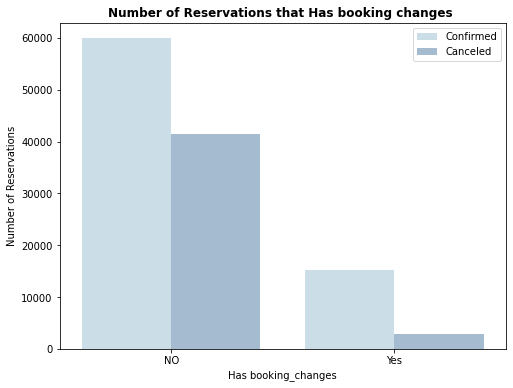

In [584]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'booking_changes', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations that Has booking changes ", weight='bold')
plt.xlabel('Has booking_changes')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

In [585]:
d.iloc[:,25:]

,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,got_required__room
0,Transient,0.00,0,0,Check-Out,2015-07-01,1
1,Transient,0.00,0,0,Check-Out,2015-07-01,1
2,Transient,75.00,0,0,Check-Out,2015-07-02,0
3,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Transient,98.00,0,1,Check-Out,2015-07-03,1
...,...,...,...,...,...,...,...
119385,Transient,96.14,0,0,Check-Out,2017-09-06,1
119386,Transient,225.43,0,2,Check-Out,2017-09-07,1
119387,Transient,157.71,0,4,Check-Out,2017-09-07,1
119388,Transient,104.40,0,0,Check-Out,2017-09-07,1


In [586]:
d['required_car_parking_spaces'] = np.where(d['required_car_parking_spaces']>= 1, 1, 0)

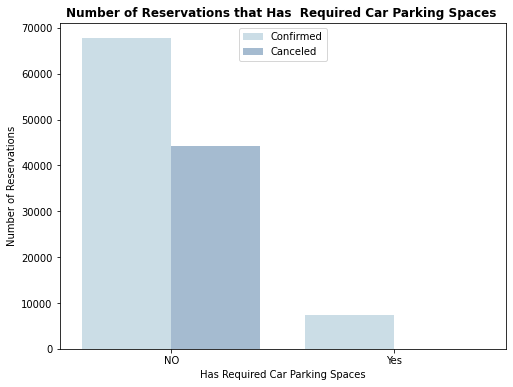

In [587]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'required_car_parking_spaces', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations that Has  Required Car Parking Spaces ", weight='bold')
plt.xlabel('Has Required Car Parking Spaces')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

In [588]:
d['total_of_special_requests'] = np.where(d['total_of_special_requests']>= 1, 1, 0)

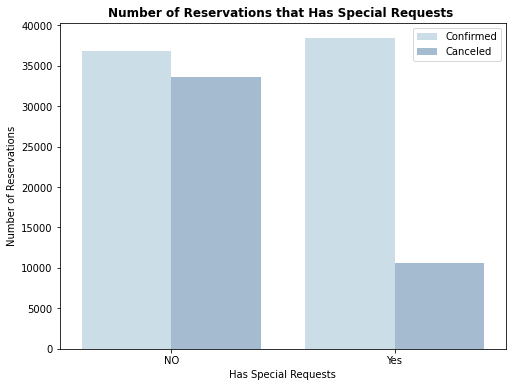

In [589]:
sns.set_palette("ch:s=.25,rot=-.25")
plt.figure(figsize = (8,6))
sns.countplot(x = 'total_of_special_requests', data = d, hue = 'is_canceled')

plt.legend(labels=['Confirmed', 'Canceled'])
plt.title("Number of Reservations that Has Special Requests ", weight='bold')
plt.xlabel('Has Special Requests')
plt.ylabel('Number of Reservations')
plt.xticks([0,1],['NO','Yes'])


plt.show()

### Feature Selection based on correlation matrix

In [590]:
# since is_canceled is almost the same as reservation_status we will drop both reservation_status and reservation_status_date
#df_booking.drop(['reservation_status'],axis=1,inplace=True)
d.drop(['reservation_status','reservation_status_date'],axis=1,inplace=True)

In [591]:
# since we add got_required_room we can remove reserved_room_type, 
d.drop(['reserved_room_type','assigned_room_type'],axis=1,inplace=True)

In [592]:
#d.drop(['children','babies','meal'],axis=1,inplace=True)

In [593]:
#d.drop(['arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number'],axis=1,inplace=True)

## Build Model

### Encode categorical features as numbers

In [594]:
d=pd.get_dummies(d, drop_first=True)

### Stratify split the data into 80% Training and 30% Testing

In [595]:
X_train, X_test, y_train, y_test = train_test_split(d.iloc[:, 1:], d.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42, stratify=d.iloc[:, 0])
train_df = X_train.copy()
train_df['is_canceled'] = y_train
X_train.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
5734,236,2016,20,12,1,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
102208,1,2016,48,20,2,2,2,0,0,0,...,1,0,0,1,0,0,0,0,1,0
24582,97,2016,22,22,2,2,2,0,0,0,...,1,0,0,1,0,0,0,0,1,0
89383,28,2016,21,19,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47127,20,2016,7,8,3,5,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [616]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

### Fit logistic regression model and show performance metrics

Training basic Logistic Regression model yielded bad performance in term of precision,recall,f-score 

### Fine Tune  Logistic Regression Classifer

In [608]:

from sklearn.linear_model import LogisticRegression



random_grid = {'penalty':['l2','l1'],'C':[.001,.01,.1,1,10,100,1000,10000], 'max_iter':[10,100,1000,10000]}


lr = LogisticRegression(random_state=42,n_jobs=-1)
lr = RandomizedSearchCV(estimator = lr, param_distributions  = random_grid, cv = 5, verbose=2,random_state=42,n_jobs = -1)# Fit the random search model
lr.fit(X_std, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 110.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'max_iter': [10, 100, 1000, 10000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

### Get Best Parameters

In [609]:
lr

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'max_iter': [10, 100, 1000, 10000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [615]:

lr = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False)

scores = cross_val_score(lr, X_std, y_train, cv=5,scoring='f1_macro', verbose=2,n_jobs = -1)
print("%0.2f f_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   33.3s remaining:   33.3s


0.80 f_macro with a standard deviation of 0.00


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.4s finished


Fine tuned Logistic Regression model still has  bad performance 

### Fine Tuning of KNN Classifer

In [617]:
from sklearn.neighbors import KNeighborsClassifier


random_grid = {'leaf_size': list(range(1,30)),'n_neighbors': list(range(1,30)), 'p':[1,2]}
print(random_grid)

knn = KNeighborsClassifier(n_jobs=-1)
knn= RandomizedSearchCV(estimator = knn, param_distributions = random_grid,  cv = 5, verbose=2,random_state=42, n_jobs = -1)# Fit the random search model
#knn.fit(X_std, y_train)

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2]}


### Get Best Parameters

In [618]:
knn.estimator

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation Using  KFold CrossValidation

In [619]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

scores = cross_val_score(knn, X_std, y_train, cv=5,scoring='f1_macro', verbose=2,n_jobs = -1)
print("%0.2f f_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed: 23.1min remaining: 23.1min


0.82 f_macro with a standard deviation of 0.00


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 23.3min finished


Fine tuned KNN model has better performance with an improvment of 2% over the Logistic Regression

### Fine Tuning of NB Classifer

In [620]:
from sklearn.naive_bayes import BernoulliNB


random_grid = {'alpha': ['0.01','0.1','1','10','100','1000'],'fit_prior':['True','False']}
print(random_grid)

nb = BernoulliNB()
nb = RandomizedSearchCV(estimator = nb, param_distributions = random_grid,  cv = 5, verbose=2,random_state=42, n_jobs = -1)# Fit the random search model
#nb.fit(X_std, y_train)

{'alpha': ['0.01', '0.1', '1', '10', '100', '1000'], 'fit_prior': ['True', 'False']}


### Get Best Parameters

In [621]:
nb

GridSearchCV(cv=10, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': ['0.01', '0.1', '1', '10', '100', '1000'],
                         'fit_prior': ['True', 'False']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

### Evaluation Using  KFold CrossValidation

In [622]:
nb = BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)

scores = cross_val_score(nb, X_std, y_train, cv=5,scoring='f1_macro', verbose=2,n_jobs = -1)
print("%0.2f f_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    8.1s remaining:    8.1s


0.77 f_macro with a standard deviation of 0.01


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.8s finished


Fine tuned NB model has bad performance compared to Logistic Regression

### Fine Tuning of SVM Classifer

In [630]:
from sklearn.svm import SVC


random_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}
print(random_grid)

svm = SVC()
svm = RandomizedSearchCV(estimator = svm, param_distributions = random_grid,  cv = 5, verbose=10,random_state=42, n_jobs = -1)# Fit the random search model
#svm.fit(X_std, y_train)

{'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}


In [ ]:
svm

In [ ]:
X_train.shape

### Evaluation Using  KFold CrossValidation

In [ ]:
svm = SVC(C=1.0, gamma=1.0, kernel='linear',
    max_iter=-1, probability=False, random_state=42, 
    verbose=True)

scores = cross_val_score(svm, X_std, y_train, cv=5,scoring='f1_macro', verbose=10,n_jobs = -1)
print("%0.2f f_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


In [ ]:
Fine tuned SVM model has better performance with an improvment of 5% over the Logistic Regression

###  Fine Tuning of RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestClassifier(max_depth=None, random_state=42,n_jobs=-1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, verbose=10,random_state=42, n_jobs = -1)# Fit the random search model
#rf_random.fit(X_std, y_train)


###  Get Best Parameters

In [ ]:
rf

### Evaluation Using  KFold CrossValidation

In [628]:
# fine tune random forest model
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

scores = cross_val_score(rf, X_std, y_train, cv=5,scoring='f1_macro', verbose=10,n_jobs = -1)
print("%0.2f f_macro with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#trainscore=rf_random.score(X_train, y_train)
#testscore=rf_random.score(X_test, y_test)
#print('Training Accuracy:{},Testing Accuracy:{}'.format(trainscore,testscore))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.6s remaining:   47.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   31.7s remaining:   21.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.8s finished


0.88 f_macro with a standard deviation of 0.00


Fine tuned RF model has the best performance with an improvment of 8% over the Logistic Regression

### Final Evaluation on Holdout 

In [ ]:
rf.fit(X_train, y_train)

trainscore=rf.score(X_train, y_train)
testscore=rf.score(X_test, y_test)
print('Training Accuracy:{},Testing Accuracy:{}'.format(trainscore,testscore))
ytest_predict = rf.predict(X_test) 
print(metrics.classification_report(y_test,ytest_predict))

In [ ]:
### handling imbalanced data

In [ ]:
### with Over Sampling

In [ ]:
import imblearn.over_sampling
# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 2, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
X_train_resampled, y_train_resampled = ROS.fit_resample(X_train, y_train)

train_RandomForestClassifier(X_train_resampled, y_train_resampled,X_test, y_test)


In [ ]:
### with under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(X_train,y_train)
train_RandomForestClassifier(X_under, y_under,X_test, y_test)


In [ ]:
# with SMOTE

In [ ]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
    
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

train_RandomForestClassifier(X_train_smote, y_train_smote,X_test, y_test)


In [ ]:
#s = setup(train_df, target = 'is_canceled', train_size = 0.99,session_id = 123)

In [ ]:
#%%time
#best = compare_models()